# Linearna regresija


## Odabir koeficijenta koristeci formulu

Koeficijenti linearne regresije se mogu odabrati koristeci sledecu formulu:

$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

In [12]:
import numpy as np

In [13]:
def show_model(model):
    return 'f(height) = {0} + {1}*height'.format(model[0], model[1])

In [14]:
height=np.array([4.0, 4.5, 5.0, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
weight=np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])

# Analiticko resenje za odabir koeficijenata 'w'.
# w = inverse(X.transpose()*X)*X.transpose()*Y

# Broj instanci u skupu podataka
N = height.shape[0]

# Matrici X dodajemo kolonu jedinica kao prvu kolonu.
# U stvari, napravili smo matricu jedinica pa smo kolonu na indeksu 1
# zamenili sa vektorom podataka (u nasem slucaju visina).
X = np.ones((N, 2))
X[:, 1] = height
y = weight
print('X.shape: {}'.format(X.shape))
print('y.shape: {}'.format(y.shape))

w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(show_model(w))

X.shape: (10, 2)
y.shape: (10,)
f(height) = -0.47266514806388216 + 10.193621867881546*height


Dobijena funkcija u stvari predstavlja jednacinu prave koju mozemo vizuelizovati.

In [21]:
x1 = height[0]
x2 = height[-1]
y1 = w[0] + w[1] * x1
y2 = w[0] + w[1] * x2
print(f'x1 = {x1}\nx2 = {x2}')
print(f'f({x1}) = {y1}\nf({x2}) = {y2}')

x1 = 4.0
x2 = 6.8
f(4.0) = 40.301822323462304
f(6.8) = 68.84396355353063


Text(0.5, 1.0, 'Ilustracija linearne regresije')

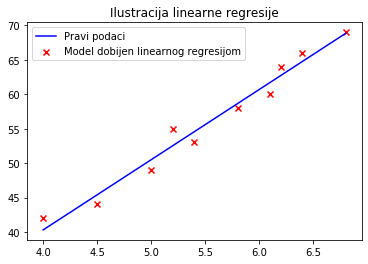

In [25]:
plt.scatter(height, weight, color='red', marker='x')
plt.plot([x1, x2], [y1, y2], color='blue')
plt.legend(['Pravi podaci', 'Model dobijen linearnog regresijom'])
plt.title('Ilustracija linearne regresije')

## Odabir koeficijenata koristeci biliboteku `scikit-learn`.
Biblioteka [scikit-learn](https://scikit-learn.org/) predstavlja jednu od popularnijih
biblioteka za masinsko ucenje i podrazava veliki broj algoritama i metoda iz oblasti.

U okviru biblioteke u modulu `linear_model` dostupna je klasa `LinearRegression` pomocu
koje se moze izvrsiti linearna regresija.

Metoda `fit` se koristi da pokrene obucavanje modela i izvrsi odabir koeficijenata.
Metoda `fit` nekada radi odabir koeficijenata pomocu prethodno naveden formule
(kada matrice nisu velike u uslovljenost nam odgovara), a u vecini realnim slucajeva
se koristi optimizacioni algoritam gradijentnog spusta (ili njegove modifikacije) da
se minimizira funkcije greske. U narednim kodovima cete videti implementaciju
algoritma gradijentni spust.

In [7]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [8]:
def show_model(model):
    return 'f(height) = {0} + {1}*height'.format(model.intercept_, model.coef_[0])

height weight
4.0 -> 42
4.5 -> 44
5.0 -> 49
5.2 -> 55
5.4 -> 53
5.8 -> 58
6.1 -> 60
6.2 -> 64
6.4 -> 66
6.8 -> 69
f(height) = -0.4726651480637756 + 10.193621867881548*height


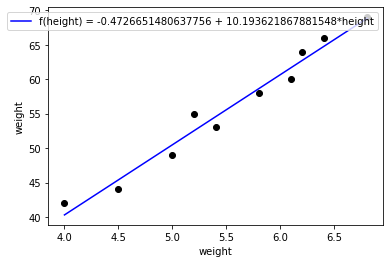

In [9]:
height=[[4.0],[4.5],[5.0],[5.2],[5.4],[5.8],[6.1],[6.2],[6.4],[6.8]]
weight=[42, 44 ,49, 55, 53, 58, 60, 64, 66, 69]

print("height weight")

for row in zip(height, weight):
    print(row[0][0],"->",row[1])

plt.scatter(height,weight,color='black')
plt.xlabel("height")
plt.ylabel("weight")

lin_reg = linear_model.LinearRegression()
lin_reg.fit(height, weight)

# Show trained model
print(show_model(lin_reg))

# Plot the model
predicted_values = [lin_reg.coef_ * i + lin_reg.intercept_ for i in height]
# predicted_values = lin_reg.predict(height)
plt.plot(height, predicted_values, 'b')
plt.xlabel('height')
plt.xlabel('weight')
plt.legend(['Dobijeni model'])
plt.legend([show_model(lin_reg)])

plt.show()